Average Silhouette Score: 0.5847853133025648


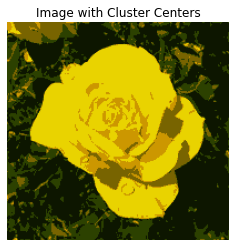

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import Voronoi, voronoi_plot_2d
from PIL import Image

# Step 1: Read the image
image_path = "rose-yellow.png"
image = Image.open(image_path)
data = np.array(image)

# Reshape the image data to a 2D array of RGB values
data = data.reshape((-1, 4))

# Step 2: Cluster using K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Step 3: Plot the Silhouette Coefficient
silhouette_avg = silhouette_score(data, cluster_labels)
print("Average Silhouette Score:", silhouette_avg)

# Step 4: Visualize clustering results using Voronoi cells
# vor = Voronoi(kmeans.cluster_centers_)
# voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2)
# plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=5)
# plt.title("Voronoi Cells and Clustering")
# plt.show()

# Step 5: Display image with color by cluster centers
cluster_centers = kmeans.cluster_centers_.astype(int)
cluster_colors = cluster_centers.reshape((1, -1, 4))
cluster_image = np.ones_like(data) * cluster_centers[cluster_labels]
cluster_image = cluster_image.reshape(image.size[1], image.size[0], 4)
plt.imshow(cluster_image.astype(np.uint8))
plt.title("Image with Cluster Centers")
plt.axis('off')
plt.show()

# Step 6: Save image with cluster colors
cluster_image_pil = Image.fromarray(cluster_image.astype(np.uint8))
cluster_image_pil.save("rose-yellow-kmeans.png")
